In [26]:
! wget 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/13836/1718836/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1612442059&Signature=geLsIRLO%2FLECw2TcQ4%2Bgem%2B2LWmE38iS7Qi4EWEVG0JzeTatHM%2FzgdEFdWG2ZsU%2BQusM51Qf2sZRuGiFXwAsWOUYrE%2BrozAN%2F%2BC7GZEqYqySLsNfgrU%2FjVxNoVDUVEXHD9UDJaZwAbxkqJnHWNvL%2BP3jfZ7aekrFUicCYObkbL4WozGCyvdr7BXXur0mCLJh1bqVluP9oG%2F8m%2BiGMrdW0sn5kLh%2BvQy8b3yt8gJXVzpVsO7%2BTI65uIpdqm8MgT%2BCeZjnpcGPamGRJlUEzPtK%2FFtp7zv56jO7WdxeyesPXfYf3eWcHY0rgvQXwWzzjq%2Bq2jQSe2BxYmeFNpRG5PoppQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dcassava-leaf-disease-classification.zip'

The name is too long, 549 chars total.
Trying to shorten...
New name is archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1612442059&Signature=geLsIRLO%2FLECw2TcQ4+gem+2LWmE38iS7Qi4EWEVG0JzeTatHM%2FzgdEFdWG2ZsU+QusM51Qf2sZRuGiFXwAsWOUYrE+rozAN%2F+C7GZEqYqySLsNfgrU%2FjVxNoVDUV.
--2021-02-01 12:34:59--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/13836/1718836/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1612442059&Signature=geLsIRLO%2FLECw2TcQ4%2Bgem%2B2LWmE38iS7Qi4EWEVG0JzeTatHM%2FzgdEFdWG2ZsU%2BQusM51Qf2sZRuGiFXwAsWOUYrE%2BrozAN%2F%2BC7GZEqYqySLsNfgrU%2FjVxNoVDUVEXHD9UDJaZwAbxkqJnHWNvL%2BP3jfZ7aekrFUicCYObkbL4WozGCyvdr7BXXur0mCLJh1bqVluP9oG%2F8m%2BiGMrdW0sn5kLh%2BvQy8b3yt8gJXVzpVsO7%2BTI65uIpdqm8MgT%2BCeZjnpcGPamGRJlUEzPtK%2FFtp7zv56jO7WdxeyesPXfYf3eWcHY0rgvQXwWzzjq%2Bq2jQSe2BxYmeFNpRG5PoppQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dcassava-leaf-disease-classification.zi

In [ ]:
!unzip '/content/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1612442059&Signature=geLsIRLO%2FLECw2TcQ4+gem+2LWmE38iS7Qi4EWEVG0JzeTatHM%2FzgdEFdWG2ZsU+QusM51Qf2sZRuGiFXwAsWOUYrE+rozAN%2F+C7GZEqYqySLsNfgrU%2FjVxNoVDUV' -d '/content/dataset'

In [34]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot  as plt
from sklearn.utils import shuffle
import cv2

import tensorflow as tf 
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D

In [35]:
data_path = "/content/dataset/"
train_csv_data_path = data_path+"train.csv"
label_json_data_path = data_path+"label_num_to_disease_map.json"
images_dir_data_path = data_path+"train_images"

In [36]:
train_csv_data_path

'/content/dataset/train.csv'

In [37]:
train_csv = pd.read_csv(train_csv_data_path)
train_csv['label'] = train_csv['label'].astype('string')

label_class = pd.read_json(label_json_data_path, orient='index')
label_class = label_class.values.flatten().tolist()

In [38]:
print("Label names :")
for i, label in enumerate(label_class):
    print(f" {i}. {label}")

Label names :
 0. Cassava Bacterial Blight (CBB)
 1. Cassava Brown Streak Disease (CBSD)
 2. Cassava Green Mottle (CGM)
 3. Cassava Mosaic Disease (CMD)
 4. Healthy


In [39]:
train_csv.head()

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


In [40]:

# Data agumentation and pre-processing using Keras
train_gen = ImageDataGenerator(
                                rotation_range=360,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                brightness_range=[0.1,0.9],
                                shear_range=25,
                                zoom_range=0.3,
                                channel_shift_range=0.1,
                                horizontal_flip=True,
                                vertical_flip=True,
                                rescale=1/255,
                                validation_split=0.15
                               )
                                    
    
valid_gen = ImageDataGenerator(rescale=1/255,
                               validation_split = 0.15
                              )



In [41]:
BATCH_SIZE = 18
IMG_SIZE = 224

In [42]:
train_generator = train_gen.flow_from_dataframe(
                            dataframe=train_csv,
                            directory = images_dir_data_path,
                            x_col = "image_id",
                            y_col = "label",
                            target_size = (IMG_SIZE, IMG_SIZE),
                            class_mode = "categorical",
                            batch_size = BATCH_SIZE,
                            shuffle = True,
                            subset = "training",

)

valid_generator = valid_gen.flow_from_dataframe(
                            dataframe=train_csv,
                            directory = images_dir_data_path,
                            x_col = "image_id",
                            y_col = "label",
                            target_size = (IMG_SIZE, IMG_SIZE),
                            class_mode = "categorical",
                            batch_size = BATCH_SIZE,
                            shuffle = False,
                            subset = "validation"
)

Found 18188 validated image filenames belonging to 5 classes.
Found 3209 validated image filenames belonging to 5 classes.


In [43]:
batch = next(train_generator)
images = batch[0]
labels = batch[1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


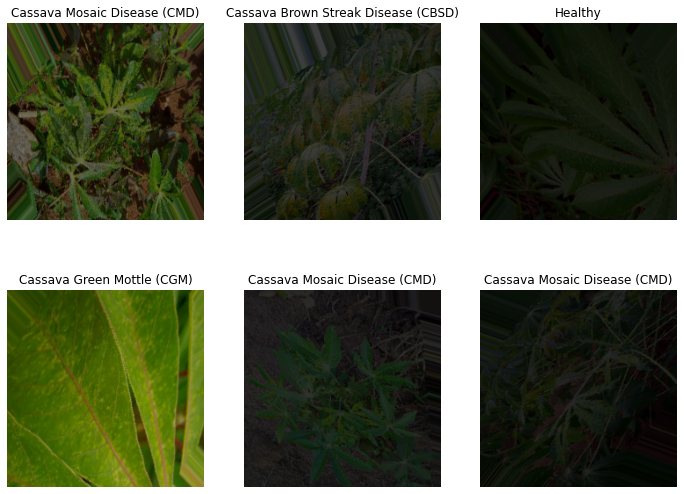

In [44]:
plt.figure(figsize=(12,9))
for i, (img, label) in enumerate(zip(images, labels)):
    plt.subplot(2,3, i%6 +1)
    plt.axis('off')
    plt.imshow(img)
    plt.title(label_class[np.argmax(label)])
    
    if i==15:
        break

## Building the model

In [45]:
# Loading the ResNet152 architecture with imagenet weights as base
base = tf.keras.applications.ResNet152(include_top=False, weights='imagenet',input_shape=[IMG_SIZE,IMG_SIZE,3])

234700800/234698864 [==============================] - 4s 0us/step


In [46]:
base.summary()

Model: "resnet152"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________________________________________________________________________________________

In [47]:
model = tf.keras.Sequential()
model.add(base)
model.add(BatchNormalization(axis=-1))
model.add(GlobalAveragePooling2D())
model.add(Dense(5, activation='softmax'))

In [48]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adamax(learning_rate=0.01), metrics=['acc'])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152 (Functional)       (None, 7, 7, 2048)        58370944  
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 7, 2048)        8192      
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 10245     
Total params: 58,389,381
Trainable params: 58,233,861
Non-trainable params: 155,520
_________________________________________________________________


## Loading the trained model

In [50]:
history = model.fit(
      train_generator,
      steps_per_epoch=BATCH_SIZE,
      epochs=20,
      validation_data=valid_generator,
      batch_size=BATCH_SIZE
      )

Epoch 1/20
18/18 [==============================] - 63s 2s/step - loss: 2.3534 - acc: 0.4261 - val_loss: 64611591544735095602402707973865472.0000 - val_acc: 0.0461
Epoch 2/20
18/18 [==============================] - 39s 2s/step - loss: 1.6025 - acc: 0.5723 - val_loss: 376839754351388917760.0000 - val_acc: 0.1016
Epoch 3/20
18/18 [==============================] - 38s 2s/step - loss: 1.3606 - acc: 0.5783 - val_loss: 188782083047424.0000 - val_acc: 0.0461
Epoch 4/20
18/18 [==============================] - 39s 2s/step - loss: 1.5023 - acc: 0.5677 - val_loss: 82071040.0000 - val_acc: 0.0461
Epoch 5/20
18/18 [==============================] - 39s 2s/step - loss: 1.3976 - acc: 0.5783 - val_loss: 85930288.0000 - val_acc: 0.0461
Epoch 6/20
18/18 [==============================] - 39s 2s/step - loss: 1.4277 - acc: 0.5548 - val_loss: 558568.7500 - val_acc: 0.1137
Epoch 7/20
18/18 [==============================] - 38s 2s/step - loss: 1.2552 - acc: 0.6080 - val_loss: 1.1888 - val_acc: 0.6183
Epo

In [51]:
model.save('ResNet152.h5')

In [52]:
# Loading the ResNet101 architecture with imagenet weights as base
base = tf.keras.applications.ResNet101(include_top=False, weights='imagenet',input_shape=[IMG_SIZE,IMG_SIZE,3])

model = tf.keras.Sequential()
model.add(base)
model.add(BatchNormalization(axis=-1))
model.add(GlobalAveragePooling2D())
model.add(Dense(5, activation='softmax'))

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adamax(learning_rate=0.01), metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=BATCH_SIZE,
      epochs=20,
      validation_data=valid_generator,
      batch_size=BATCH_SIZE
      )

model.save('ResNet101.h5')

171450368/171446536 [==============================] - 10s 0us/step
Epoch 1/20
18/18 [==============================] - 46s 2s/step - loss: 1.9354 - acc: 0.4360 - val_loss: 140657733280864564450164736.0000 - val_acc: 0.6183
Epoch 2/20
18/18 [==============================] - 36s 2s/step - loss: 2.1079 - acc: 0.6293 - val_loss: 762626808217600.0000 - val_acc: 0.6183
Epoch 3/20
18/18 [==============================] - 35s 2s/step - loss: 1.1870 - acc: 0.6364 - val_loss: 6606062592.0000 - val_acc: 0.1137
Epoch 4/20
18/18 [==============================] - 35s 2s/step - loss: 1.2607 - acc: 0.6103 - val_loss: 3468996.7500 - val_acc: 0.1203
Epoch 5/20
18/18 [==============================] - 35s 2s/step - loss: 1.2212 - acc: 0.6479 - val_loss: 64244.7500 - val_acc: 0.1203
Epoch 6/20
18/18 [==============================] - 35s 2s/step - loss: 1.4372 - acc: 0.5582 - val_loss: 5700.8882 - val_acc: 0.1203
Epoch 7/20
18/18 [==============================] - 35s 2s/step - loss: 1.2593 - acc: 0.60

In [53]:
# Loading the ResNet50 architecture with imagenet weights as base
base = tf.keras.applications.ResNet50(include_top=False, weights='imagenet',input_shape=[IMG_SIZE,IMG_SIZE,3])

model = tf.keras.Sequential()
model.add(base)
model.add(BatchNormalization(axis=-1))
model.add(GlobalAveragePooling2D())
model.add(Dense(5, activation='softmax'))

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adamax(learning_rate=0.01), metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=BATCH_SIZE,
      epochs=20,
      validation_data=valid_generator,
      batch_size=BATCH_SIZE
      )

model.save('ResNet50.h5')

94773248/94765736 [==============================] - 5s 0us/step
Epoch 1/20
18/18 [==============================] - 39s 2s/step - loss: 2.3171 - acc: 0.3756 - val_loss: 5996108840960.0000 - val_acc: 0.6183
Epoch 2/20
18/18 [==============================] - 33s 2s/step - loss: 1.6025 - acc: 0.5635 - val_loss: 156972576.0000 - val_acc: 0.6183
Epoch 3/20
18/18 [==============================] - 33s 2s/step - loss: 1.2589 - acc: 0.6627 - val_loss: 570136.4375 - val_acc: 0.6183
Epoch 4/20
18/18 [==============================] - 33s 2s/step - loss: 1.2363 - acc: 0.6616 - val_loss: 70028.6562 - val_acc: 0.1016
Epoch 5/20
18/18 [==============================] - 33s 2s/step - loss: 1.2303 - acc: 0.5884 - val_loss: 263.9961 - val_acc: 0.1137
Epoch 6/20
18/18 [==============================] - 33s 2s/step - loss: 1.0753 - acc: 0.6638 - val_loss: 1.3558 - val_acc: 0.6183
Epoch 7/20
18/18 [==============================] - 33s 2s/step - loss: 1.1684 - acc: 0.6188 - val_loss: 1.1833 - val_acc: 0

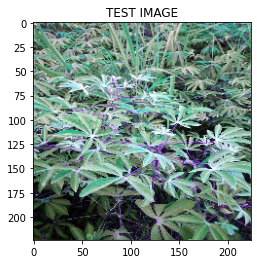

In [55]:
test_img_path = data_path+"test_images/2216849948.jpg"

img = cv2.imread(test_img_path)
resized_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)).reshape(-1, IMG_SIZE, IMG_SIZE, 3)/255

plt.figure(figsize=(8,4))
plt.title("TEST IMAGE")
plt.imshow(resized_img[0])

In [56]:
preds = []
ss = pd.read_csv(data_path+'sample_submission.csv')

for image in ss.image_id:
    img = tf.keras.preprocessing.image.load_img(data_path+'test_images/' + image)
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = tf.keras.preprocessing.image.smart_resize(img, (IMG_SIZE, IMG_SIZE))
    img = tf.reshape(img, (-1, IMG_SIZE, IMG_SIZE, 3))
    prediction = model.predict(img/255)
    preds.append(np.argmax(prediction))

my_submission = pd.DataFrame({'image_id': ss.image_id, 'label': preds})
my_submission.to_csv('submission.csv', index=False) 

In [57]:
# Submission file ouput
print("Submission File: \n---------------\n")
print(my_submission.head()) # Predicted Output

Submission File: 
---------------

         image_id  label
0  2216849948.jpg      3
